<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Breast-Cancer-Binary-Classification---Malignant/Benign" data-toc-modified-id="Breast-Cancer-Binary-Classification---Malignant/Benign-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Breast Cancer Binary Classification - Malignant/Benign</a></span></li><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Descriptive-Analytics" data-toc-modified-id="Descriptive-Analytics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Descriptive Analytics</a></span></li><li><span><a href="#Data-Pre-processing" data-toc-modified-id="Data-Pre-processing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Pre-processing</a></span></li><li><span><a href="#Build-Model" data-toc-modified-id="Build-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Build Model</a></span><ul class="toc-item"><li><span><a href="#1-Layer---100-epochs" data-toc-modified-id="1-Layer---100-epochs-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>1 Layer - 100 epochs</a></span></li><li><span><a href="#2-layers---100-epochs" data-toc-modified-id="2-layers---100-epochs-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>2 layers - 100 epochs</a></span></li></ul></li><li><span><a href="#Keras-tuner" data-toc-modified-id="Keras-tuner-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Keras tuner</a></span></li></ul></div>

# Breast Cancer Binary Classification - Malignant/Benign

# Import libraries

In [475]:
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn import datasets

In [435]:
import numpy as np
np.set_printoptions(formatter={'float': '{:0.2f}'.format})

# Load Data

In [476]:
breast_cancer_data = datasets.load_breast_cancer()
X, y = breast_cancer_data.data, breast_cancer_data.target

In [477]:
breast_cancer_data.DESCR.splitlines()

['.. _breast_cancer_dataset:',
 '',
 'Breast cancer wisconsin (diagnostic) dataset',
 '--------------------------------------------',
 '',
 '**Data Set Characteristics:**',
 '',
 '    :Number of Instances: 569',
 '',
 '    :Number of Attributes: 30 numeric, predictive attributes and the class',
 '',
 '    :Attribute Information:',
 '        - radius (mean of distances from center to points on the perimeter)',
 '        - texture (standard deviation of gray-scale values)',
 '        - perimeter',
 '        - area',
 '        - smoothness (local variation in radius lengths)',
 '        - compactness (perimeter^2 / area - 1.0)',
 '        - concavity (severity of concave portions of the contour)',
 '        - concave points (number of concave portions of the contour)',
 '        - symmetry',
 '        - fractal dimension ("coastline approximation" - 1)',
 '',
 '        The mean, standard error, and "worst" or largest (mean of the three',
 '        worst/largest values) of these features w

In [478]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


# Descriptive Analytics

In [479]:
breast_cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [480]:
breast_cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [481]:
type(X)

numpy.ndarray

In [482]:
df=pd.DataFrame(X, columns=list(breast_cancer_data.feature_names))

In [483]:
df['malignant']=y

In [484]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [485]:
df.malignant.value_counts()

1    357
0    212
Name: malignant, dtype: int64

In [486]:
correlations = df.corr()['malignant'].drop('malignant')

In [299]:
correlations

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

<AxesSubplot:>

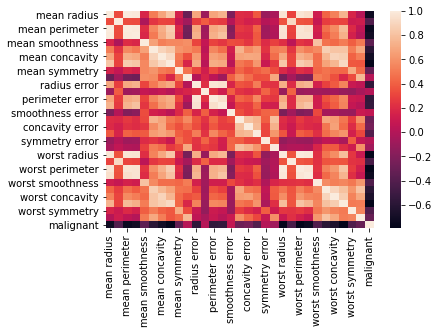

In [60]:
import seaborn as sns
sns.heatmap(df.corr())

<AxesSubplot:>

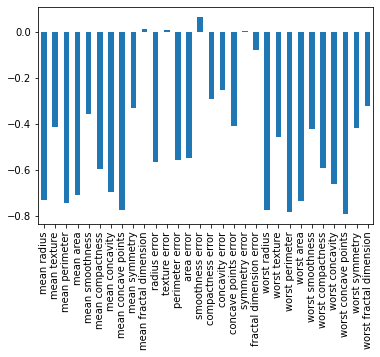

In [61]:
correlations.plot(kind='bar')

# Data Pre-processing

In [528]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [529]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [545]:
y_test.shape

(114,)

In [547]:
pd.DataFrame(y_test).value_counts()

1    71
0    43
dtype: int64

# Build Model

## 1 Layer - 100 epochs

In [530]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(16, input_shape=(30, ), activation='relu', name='dense_1'))
model.add(Dense(2, activation='sigmoid', name='dense_output'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_output (Dense)         (None, 2)                 34        
Total params: 530
Trainable params: 530
Non-trainable params: 0
_________________________________________________________________


In [531]:
result = model.fit(X_train, y_train, epochs=100, validation_split=0.05)

Epoch 1/100
14/14 [==============================] - 0s 10ms/step - loss: 1.1508 - accuracy: 0.4516 - val_loss: 0.9261 - val_accuracy: 0.5217
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.9319 - accuracy: 0.5851 - val_loss: 0.7144 - val_accuracy: 0.6522
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6313 - accuracy: 0.6568 - val_loss: 0.5589 - val_accuracy: 0.6957
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4518 - accuracy: 0.7420 - val_loss: 0.4477 - val_accuracy: 0.8261
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3455 - accuracy: 0.8659 - val_loss: 0.3683 - val_accuracy: 0.9130
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.2815 - accuracy: 0.8986 - val_loss: 0.3126 - val_accuracy: 0.9565
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.2401 - accuracy: 0.9124 - val_loss: 0.2762 - val_accuracy: 0.9565
Epoch 8/100


In [532]:
result.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [533]:
loss, acc = model.evaluate(X_test, y_test)
print('Loss on test data:     ', loss)
print('Accuracy on test data: ', acc)

4/4 [==============================] - 0s 914us/step - loss: 0.0643 - accuracy: 0.9825
Loss on test data:      0.06432144343852997
Accuracy on test data:  0.9824561476707458


In [534]:
y_pred=model.predict_classes(X_test)

/usr/local/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Below, we have a function called plot_confusion_matrix() that came directly from scikit-learn's website. This is code that they provide in order to plot the confusion matrix. 

In [535]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    import itertools
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [536]:
def create_confusion_matrix(y_test, y_pred):
    from sklearn.metrics import confusion_matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cnf_matrix, [0,1])

Confusion matrix, without normalization
[[42  1]
 [ 1 70]]


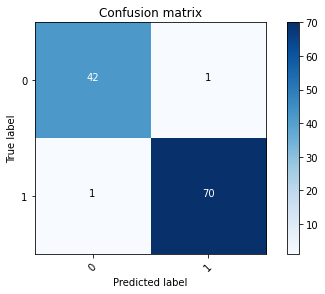

In [537]:
create_confusion_matrix(y_test, y_pred)

In [538]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## 2 layers - 100 epochs

In [539]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(16, input_shape=(30, ), activation='relu', name='dense_1'))
model.add(Dense(16, activation='relu', name='dense_2'))
model.add(Dense(2, activation='sigmoid', name='dense_output'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_output (Dense)         (None, 2)                 34        
Total params: 802
Trainable params: 802
Non-trainable params: 0
_________________________________________________________________


In [540]:
result = model.fit(X_train, y_train, epochs=100, validation_split=0.05)

Epoch 1/100
14/14 [==============================] - 0s 11ms/step - loss: 0.5563 - accuracy: 0.7716 - val_loss: 0.4467 - val_accuracy: 0.7826
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3580 - accuracy: 0.9001 - val_loss: 0.3282 - val_accuracy: 0.8696
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.2629 - accuracy: 0.9377 - val_loss: 0.2576 - val_accuracy: 0.9130
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.1967 - accuracy: 0.9427 - val_loss: 0.2174 - val_accuracy: 0.9130
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.1749 - accuracy: 0.9421 - val_loss: 0.1905 - val_accuracy: 0.9130
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.1266 - accuracy: 0.9635 - val_loss: 0.1708 - val_accuracy: 0.9130
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.1315 - accuracy: 0.9612 - val_loss: 0.1569 - val_accuracy: 0.9130
Epoch 8/100


In [541]:
loss, acc = model.evaluate(X_test, y_test)
print('Loss on test data: ', loss)
print('Accuracy on test data: ', acc)

4/4 [==============================] - 0s 908us/step - loss: 0.1044 - accuracy: 0.9737
Loss on test data:  0.10441046953201294
Accuracy on test data:  0.9736841917037964


In [542]:
y_pred=model.predict_classes(X_test)

/usr/local/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [543]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Confusion matrix, without normalization
[[41  2]
 [ 1 70]]


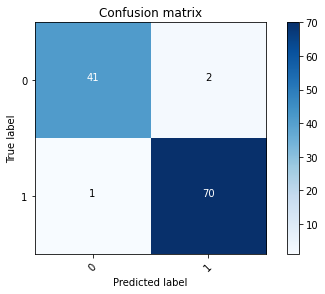

In [544]:
create_confusion_matrix(y_test, y_pred)

In [548]:
pd.DataFrame(y_pred).value_counts()

1    72
0    42
dtype: int64

# Keras tuner

In [237]:
! pip install keras-tuner

     |████████████████████████████████| 62 kB 1.2 MB/s eta 0:00:011
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-py3-none-any.whl size=78936 sha256=73d6f73df20d85489e87bc3aaf63200f7b48740a18e53d845cb0957a8c096b21
  Stored in directory: /Users/shekharkhandelwal/Library/Caches/pip/wheels/53/3d/c3/160c686bd74a18989843fcd015e8f6954ca8d834fd2ef4658a
  Created wheel for terminaltables: filename=terminaltables-3.1.0-py3-none-any.whl size=15355 sha256=eb367d577cafa84ba80529986e0e15ec29dc1820d136d18a8f3e6c9064c70206
  Stored in directory: /Users/shekharkhandelwal/Library/Caches/pip/wheels/08/8f/5f/253d0105a55bd84ee61ef0d37dbf70421e61e0cd70cef7c5e1
Successfully built keras-tuner terminaltables


In [391]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [600]:
def build_model(hp):  
    model = keras.Sequential()
    
    for i in range(hp.Int('layers', 2, 6)):
        model.add(layers.Dense(
            units=hp.Int('units' + "_" + str(i),
                        min_value=8,
                        max_value=128,
                        step=20),
            activation=hp.Choice("activation" + "_" + str(i),
                                 ['relu', 'sigmoid']
                                )
                            )
                         )
    
    model.add(layers.Dense(2, activation='sigmoid'))
    model.compile(
            optimizer=keras.optimizers.Adam(
                hp.Choice('learning_rate', 
                          values=[1e-2, 1e-3, 1e-4])),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
  
    return model

In [601]:
!rm -rf keras_tuner/

In [602]:
tuner=RandomSearch(build_model,
                  objective='val_accuracy',
                  max_trials=5,
                  executions_per_trial=3,
                  directory='.',
                  project_name="keras_tuner")

In [603]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 6, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 20, 'sampling': None}
activation_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 20, 'sampling': None}
activation_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [604]:
tuner.search(X_train, y_train, 
             epochs=100, 
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 16s]
val_accuracy: 0.9912280440330505

Best val_accuracy So Far: 0.9912280440330505
Total elapsed time: 00h 01m 22s
INFO:tensorflow:Oracle triggered exit


In [605]:
tuner.results_summary()

Results summary
Results in ./keras_tuner
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
layers: 5
units_0: 108
activation_0: sigmoid
units_1: 128
activation_1: sigmoid
learning_rate: 0.0001
units_2: 88
activation_2: relu
units_3: 108
activation_3: sigmoid
units_4: 108
activation_4: sigmoid
Score: 0.9912280440330505
Trial summary
Hyperparameters:
layers: 5
units_0: 128
activation_0: sigmoid
units_1: 108
activation_1: relu
learning_rate: 0.001
units_2: 68
activation_2: relu
units_3: 28
activation_3: sigmoid
units_4: 28
activation_4: sigmoid
Score: 0.9912280440330505
Trial summary
Hyperparameters:
layers: 3
units_0: 88
activation_0: sigmoid
units_1: 68
activation_1: relu
learning_rate: 0.0001
units_2: 28
activation_2: relu
units_3: 68
activation_3: sigmoid
units_4: 128
activation_4: relu
Score: 0.988304078578949
Trial summary
Hyperparameters:
layers: 5
units_0: 28
activation_0: relu
units_1: 108
activation_1: sigmoid
learning_rate: 0.

In [606]:
model=tuner.get_best_models(num_models=1)[0]
model.fit(X_train, y_train, epochs=100, validation_split=0.05, initial_epoch=3)

Epoch 4/100
14/14 [==============================] - 1s 11ms/step - loss: 0.1058 - accuracy: 0.9717 - val_loss: 0.1595 - val_accuracy: 0.9130
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.1158 - accuracy: 0.9643 - val_loss: 0.1554 - val_accuracy: 0.9130
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.1127 - accuracy: 0.9611 - val_loss: 0.1517 - val_accuracy: 0.9130
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0980 - accuracy: 0.9753 - val_loss: 0.1480 - val_accuracy: 0.9130
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0949 - accuracy: 0.9741 - val_loss: 0.1443 - val_accuracy: 0.9130
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0851 - accuracy: 0.9845 - val_loss: 0.1409 - val_accuracy: 0.9130
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0821 - accuracy: 0.9763 - val_loss: 0.1381 - val_accuracy: 0.9565
Epoch 11/10

In [607]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 108)               3348      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               13952     
_________________________________________________________________
dense_2 (Dense)              (None, 88)                11352     
_________________________________________________________________
dense_3 (Dense)              (None, 108)               9612      
_________________________________________________________________
dense_4 (Dense)              (None, 108)               11772     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 218       
Total params: 50,254
Trainable params: 50,254
Non-trainable params: 0
____________________________________________________

In [608]:
loss_nn, acc_nn = model.evaluate(X_test, y_test)
print('Loss on test data: ', loss_nn)
print('Accuracy on test data: ', acc_nn)

4/4 [==============================] - 0s 1ms/step - loss: 0.0573 - accuracy: 0.9825
Loss on test data:  0.05729742348194122
Accuracy on test data:  0.9824561476707458


In [609]:
y_pred=model.predict_classes(X_test)

/usr/local/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [610]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Confusion matrix, without normalization
[[42  1]
 [ 1 70]]


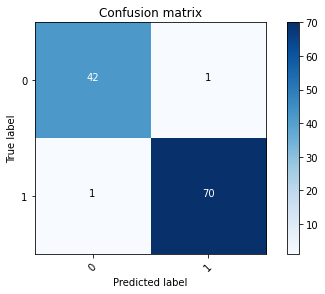

In [611]:
create_confusion_matrix(y_test, y_pred)

In [75]:
for i in range(len(X_test)):
	print("X=%s, Predicted=%s, Actual=%s" % (X_test[i], y_pred_class[i], y_test[i]))


X=[-0.46649743 -0.13728933 -0.44421138 -0.48646498  0.28085007  0.04160589
 -0.11146496 -0.26486866  0.41524141  0.13513744 -0.02091509 -0.29323907
 -0.17460869 -0.2072995  -0.01181432 -0.35108921 -0.1810535  -0.24238831
 -0.33731758 -0.0842133  -0.2632354  -0.14784208 -0.33154752 -0.35109337
  0.48001942 -0.09649594 -0.03583041 -0.19435087  0.17275669  0.20372995], Predicted=[1], Actual=1
X=[ 1.36536344  0.49866473  1.30551088  1.34147086 -0.40653902 -0.0137241
  0.24063659  0.82144876 -0.83398079 -1.13121527  1.36745547 -0.74874907
  1.27009847  1.18638199 -0.83350144 -0.49043919 -0.31559     0.28726031
 -0.82243534 -0.76235747  1.79461875  0.17237239  1.76366112  1.7441412
 -0.53051417 -0.12362004 -0.02818105  0.99177862 -0.561211   -1.00838949], Predicted=[0], Actual=0
X=[ 0.38006578  0.06921974  0.40410139  0.26659607  0.96752014  0.35641445
  0.72690205  0.85722095  0.43709369 -0.66605282  0.25555697 -0.77018483
  0.11394607  0.17460653 -0.24531887 -0.58082836 -0.14617367 -0.1533

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
y_pred_lg = lg_model.predict(X_test)
loss_lg = log_loss(y_test, y_pred_lg)
acc_lg = accuracy_score(y_test, y_pred_lg)
print('Loss on test data: ', loss_lg)
print('Accuracy on test data: ', acc_lg)

Loss on test data:  0.9089291963122152
Accuracy on test data:  0.9736842105263158


In [30]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [31]:
y_pred_nn=model.predict(X_test)
y_pred_nn

array([[9.9666834e-01],
       [1.6695373e-15],
       [8.6272885e-11],
       [1.0000000e+00],
       [1.0000000e+00],
       [6.6424201e-34],
       [1.8036199e-27],
       [5.2641943e-05],
       [8.9867300e-01],
       [1.0000000e+00],
       [7.4705702e-01],
       [4.1725116e-06],
       [1.0000000e+00],
       [2.7581365e-07],
       [1.0000000e+00],
       [6.1496717e-11],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [5.3772411e-21],
       [9.9998623e-01],
       [9.9999964e-01],
       [1.1227873e-30],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0049545e-18],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999738e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [7.6540518e-06],
       [9.9999797e-01],
       [7.6905245e-16],
       [9.9984151e-01],
       [1.0000000e+00],
       [1.358355

In [32]:
y_pred_classes_nn=model.predict_classes(X_test)
y_pred_classes_nn

/usr/local/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
    

In [33]:
y_pred_prob_nn=model.predict_proba(X_test)
y_pred_prob_nn

/usr/local/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[9.9666834e-01],
       [1.6695373e-15],
       [8.6272885e-11],
       [1.0000000e+00],
       [1.0000000e+00],
       [6.6424201e-34],
       [1.8036199e-27],
       [5.2641943e-05],
       [8.9867300e-01],
       [1.0000000e+00],
       [7.4705702e-01],
       [4.1725116e-06],
       [1.0000000e+00],
       [2.7581365e-07],
       [1.0000000e+00],
       [6.1496717e-11],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [5.3772411e-21],
       [9.9998623e-01],
       [9.9999964e-01],
       [1.1227873e-30],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0049545e-18],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999738e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [7.6540518e-06],
       [9.9999797e-01],
       [7.6905245e-16],
       [9.9984151e-01],
       [1.0000000e+00],
       [1.358355

In [34]:
len(X_test)

114

In [35]:
for i in range(len(X_test)):
	print("X=%s, Predicted=%s, Actual=%s" % (X_test[i], y_pred_classes_nn[i], y_test[i]))


X=[-0.46649743 -0.13728933 -0.44421138 -0.48646498  0.28085007  0.04160589
 -0.11146496 -0.26486866  0.41524141  0.13513744 -0.02091509 -0.29323907
 -0.17460869 -0.2072995  -0.01181432 -0.35108921 -0.1810535  -0.24238831
 -0.33731758 -0.0842133  -0.2632354  -0.14784208 -0.33154752 -0.35109337
  0.48001942 -0.09649594 -0.03583041 -0.19435087  0.17275669  0.20372995], Predicted=[1], Actual=1
X=[ 1.36536344  0.49866473  1.30551088  1.34147086 -0.40653902 -0.0137241
  0.24063659  0.82144876 -0.83398079 -1.13121527  1.36745547 -0.74874907
  1.27009847  1.18638199 -0.83350144 -0.49043919 -0.31559     0.28726031
 -0.82243534 -0.76235747  1.79461875  0.17237239  1.76366112  1.7441412
 -0.53051417 -0.12362004 -0.02818105  0.99177862 -0.561211   -1.00838949], Predicted=[0], Actual=0
X=[ 0.38006578  0.06921974  0.40410139  0.26659607  0.96752014  0.35641445
  0.72690205  0.85722095  0.43709369 -0.66605282  0.25555697 -0.77018483
  0.11394607  0.17460653 -0.24531887 -0.58082836 -0.14617367 -0.1533